In [12]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import math
import glob
import seaborn as sns
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import warnings
warnings.simplefilter('ignore') # filter some warning messages

In [7]:
ddir = '../saildrone data/'
ddir = '/users/sol/Google Drive/Shared drives/NASA_SSS/data/sss_collocations_8day_nearest_norepeat_mur/'
fns = glob.glob(ddir+'*JPL*.nc')
fns

['/users/sol/Google Drive/Shared drives/NASA_SSS/data/sss_collocations_8day_nearest_norepeat_mur/saildrone_west_coast_survey_2019_sd1040_JPLv5.0_8dy_20210613norep_20210613_20211116.nc',
 '/users/sol/Google Drive/Shared drives/NASA_SSS/data/sss_collocations_8day_nearest_norepeat_mur/saildrone_arctic_sd1034_2019_JPLv5.0_8dy_20210613norep_20210613_20211116.nc',
 '/users/sol/Google Drive/Shared drives/NASA_SSS/data/sss_collocations_8day_nearest_norepeat_mur/saildrone_arctic_2017_sd1001_JPLv5.0_8dy_20210613norep_20210613_20211116.nc',
 '/users/sol/Google Drive/Shared drives/NASA_SSS/data/sss_collocations_8day_nearest_norepeat_mur/saildrone-gen_5-atomic_eurec4a_2020-sd1061-20200117T000000-20200302T235959-1_minutes-v1.1589307121602_JPLv5.0_8dy_20210613norep_20210613_20211116.nc',
 '/users/sol/Google Drive/Shared drives/NASA_SSS/data/sss_collocations_8day_nearest_norepeat_mur/saildrone-gen_4-shark-2018-sd1004-20180315T000000-20180617T235959-1_minutes-v1.1581627077777_JPLv5.0_8dy_20210613norep_

10.913111467889909 19.433313829787235
28.784307079646016 33.16212385321101
0.3846292372881356 11.5102131147541
23.258930769230766 32.63825
6.435015748031495 11.793128289473684
99999.0 99999.0
26.39437679814385 27.784089705882355
33.52801794425088 36.417736243386244
10.818977049180328 22.685787234042557
32.90364853556486 35.086887596899224
11.82599305189094 20.106673285198553
20.01033125 33.65575011764706
6.936324387197595 13.718958288431168
31.478599548339844 32.904440307617186
23.817493877551023 29.395857142857146
99999.0 99999.0
12.230915212527965 20.07845299145299
30.647690178571427 33.65024470588236
10.519851077313053 18.237903225806452
30.301961245235066 33.589502487562186
11.476134782608698 28.76954860186418
32.22148635235732 34.612126582278485
26.41405400943396 27.79655919117647
33.51179428571429 36.41917929515419
10.153201807228916 22.06251260504202
31.365333333333336 33.739726315789476
1.3455630975143402 11.122525547445257
99999.0 99999.0
0.19999673913043478 10.853101257861637

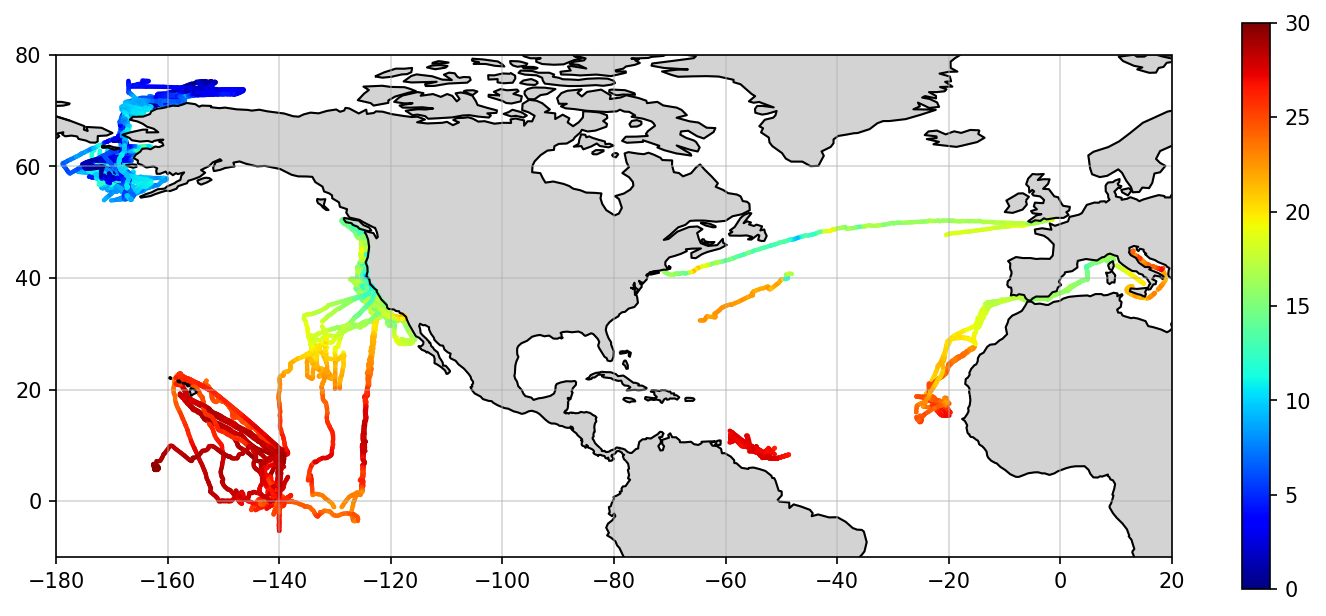

In [11]:
fig=plt.figure(figsize=(12,5),dpi=150)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-180,20,-10,80],crs=ccrs.PlateCarree())
ax.set_xticks([-180,-160,-140,-120,-100,-80,-60,-40,-20,0,20], crs=ccrs.PlateCarree())
ax.set_yticks([0,20,40,60,80], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.LAND, color='lightgrey')
    
for i in fns:
    ds = xr.open_dataset(i)
    ds.close()  
    # map
    cb = ax.scatter(ds['lon'],ds['lat'], 5,ds['TEMP_CTD_MEAN'],'.', transform=ccrs.PlateCarree(), cmap='jet', vmin=0, vmax=30)
    print(ds['TEMP_CTD_MEAN'].min().values,ds['TEMP_CTD_MEAN'].max().values)
    print(ds['SAL_CTD_MEAN'].min().values,ds['SAL_CTD_MEAN'].max().values)

fig.colorbar(cb)
plt.grid(zorder=0, alpha=0.5)
plt.show()

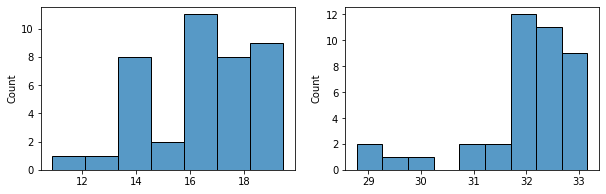

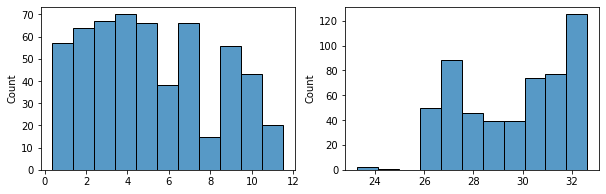

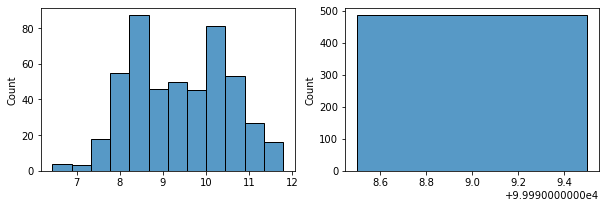

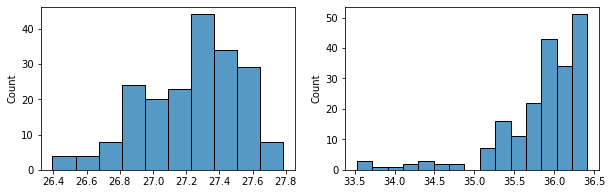

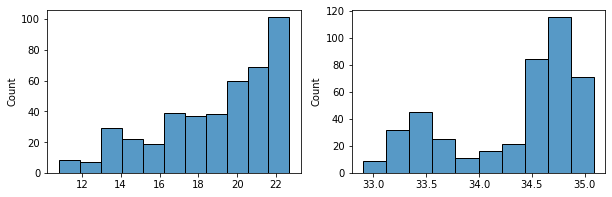

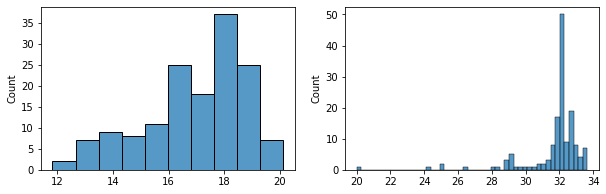

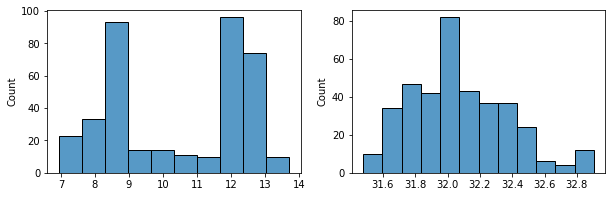

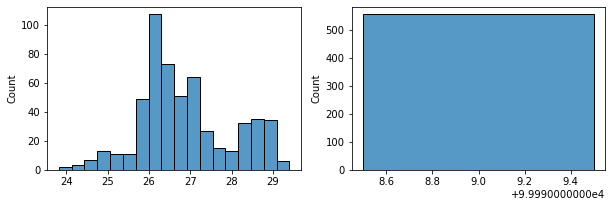

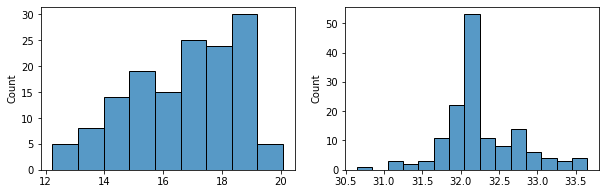

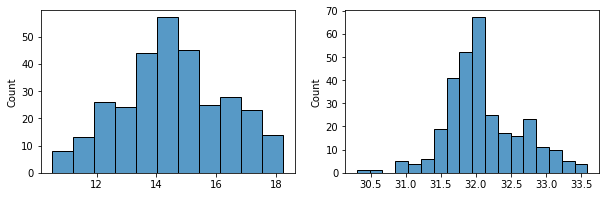

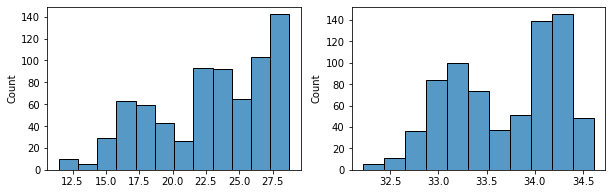

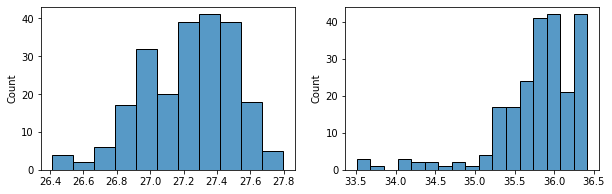

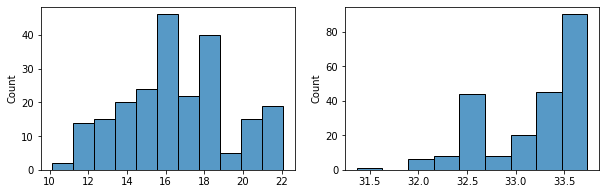

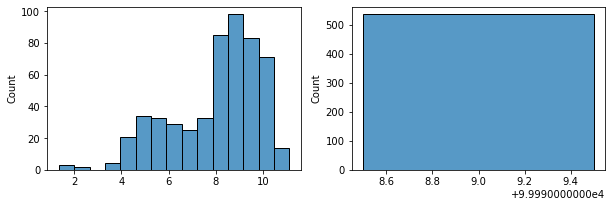

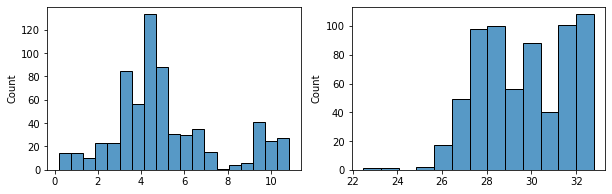

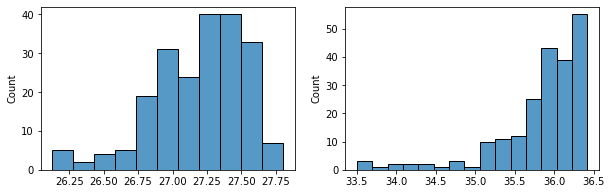

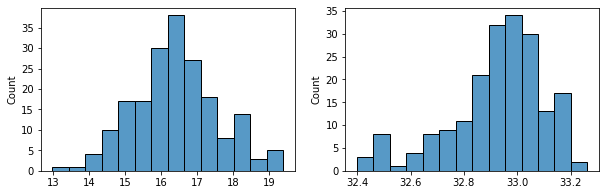

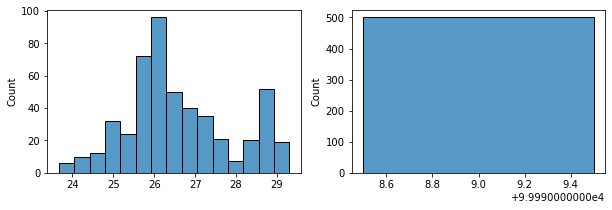

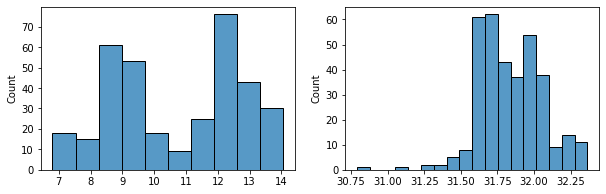

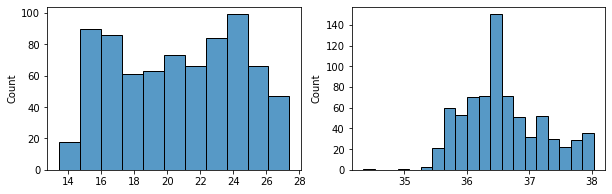

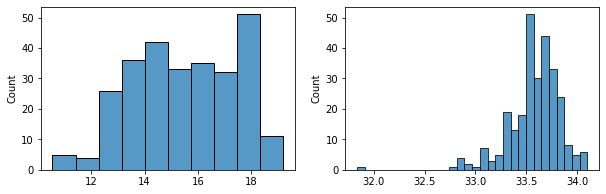

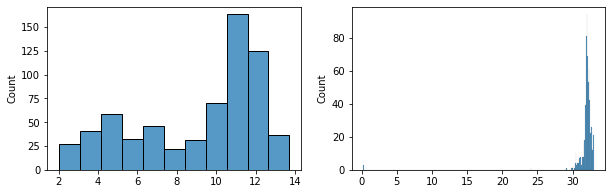

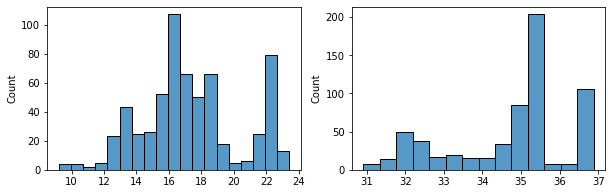

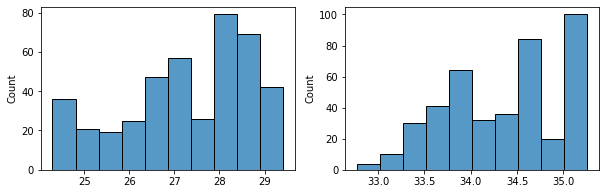

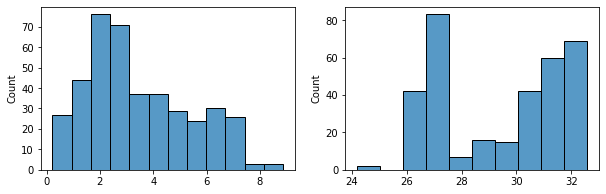

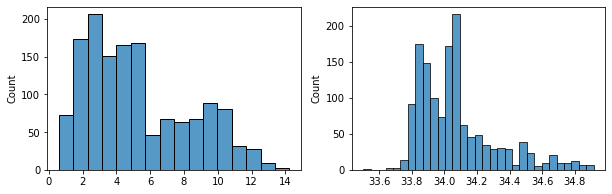

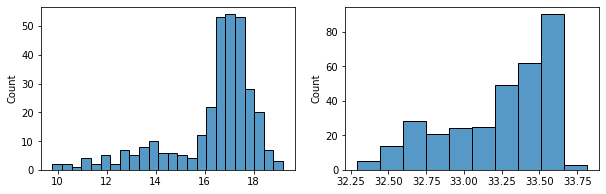

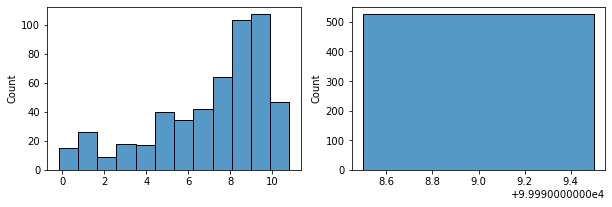

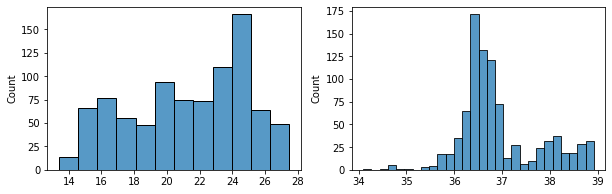

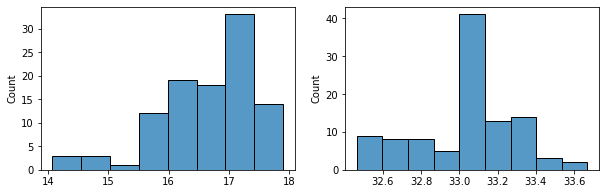

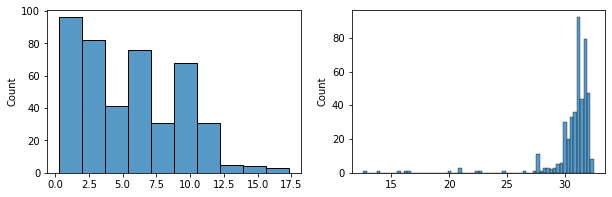

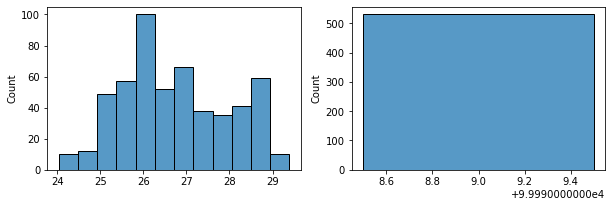

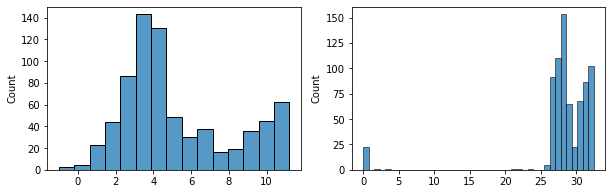

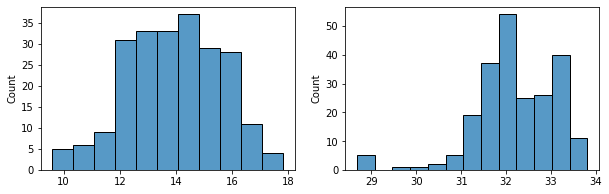

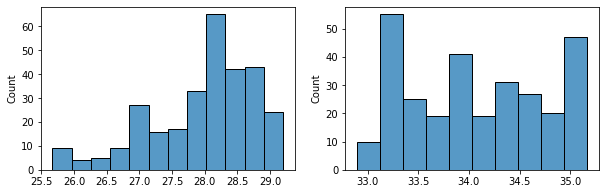

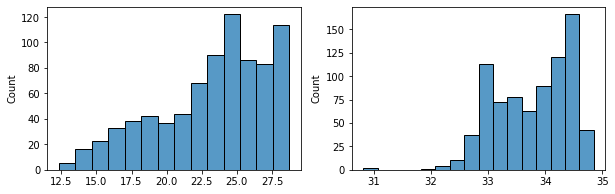

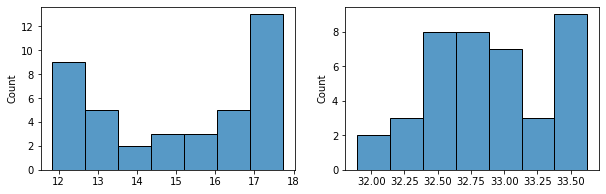

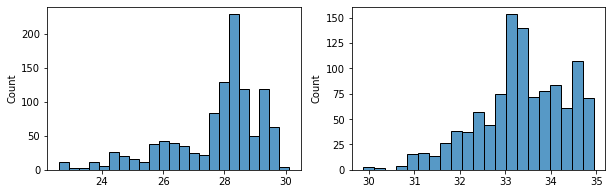

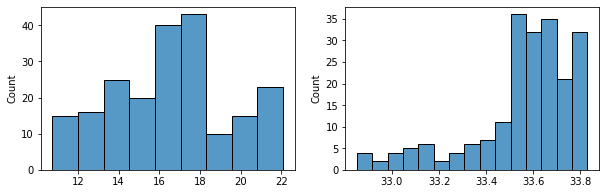

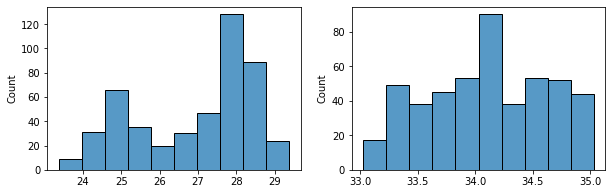

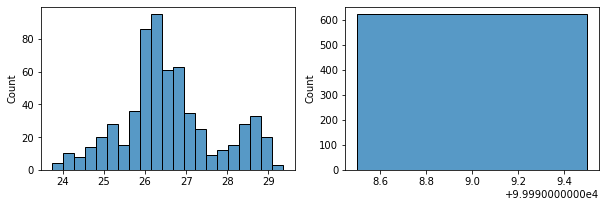

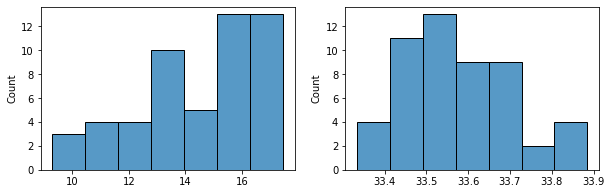

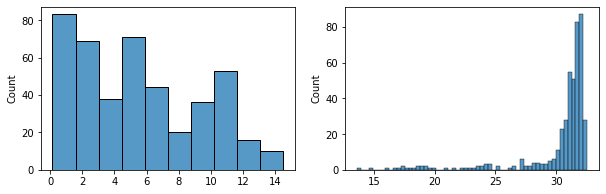

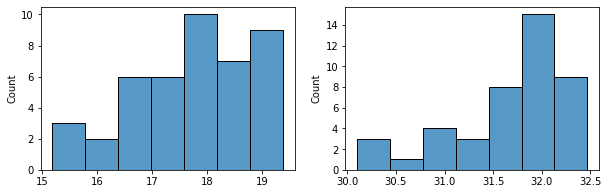

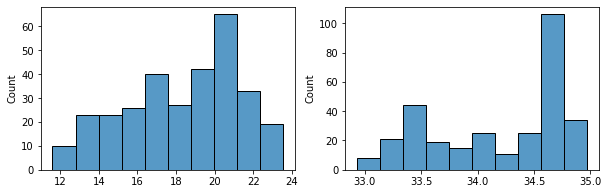

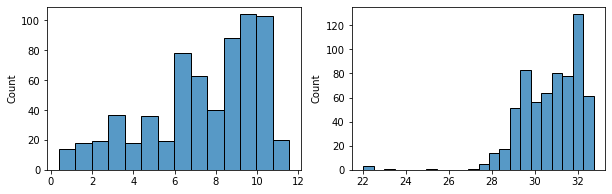

In [14]:
for i in fns:
    ds = xr.open_dataset(i)
    ds.close()  
    # map
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    sns.histplot(ds['TEMP_CTD_MEAN'])
    plt.subplot(1,2,2)
    sns.histplot(ds['SAL_CTD_MEAN'])
    plt.show()

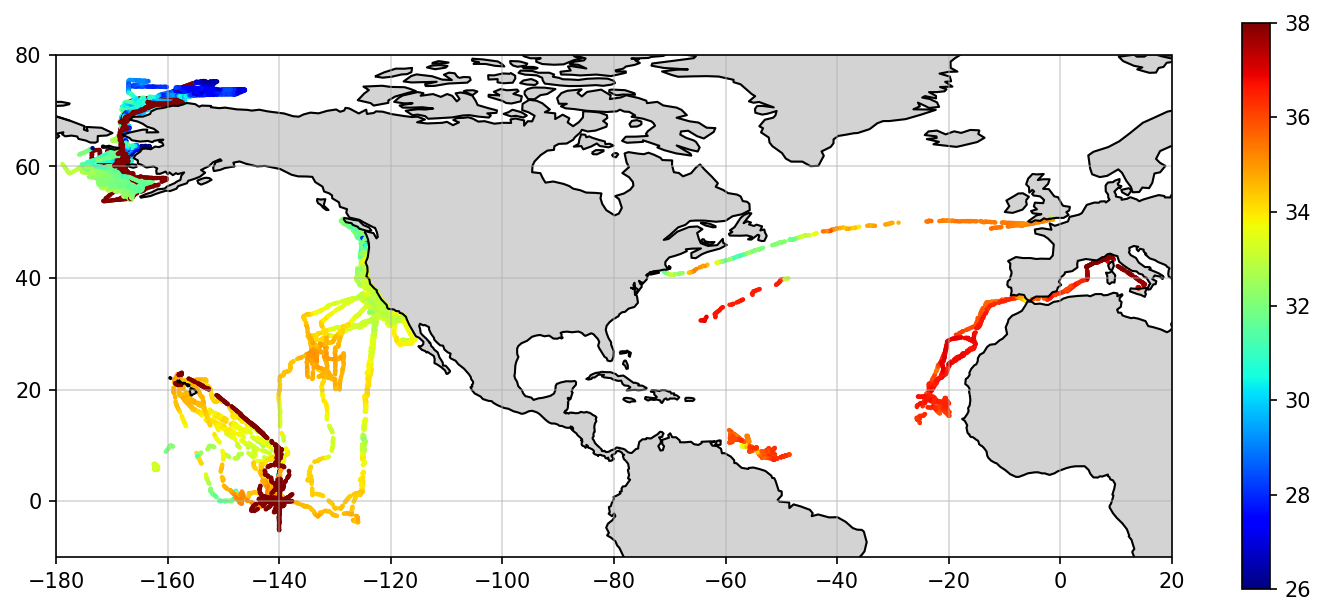

In [96]:
fig=plt.figure(figsize=(12,5),dpi=150)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-180,20,-10,80],crs=ccrs.PlateCarree())
ax.set_xticks([-180,-160,-140,-120,-100,-80,-60,-40,-20,0,20], crs=ccrs.PlateCarree())
ax.set_yticks([0,20,40,60,80], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.LAND, color='lightgrey')
    
    

for i in fns:
    ds = xr.open_dataset(i)
    ds.close()  
    # map
    cb = ax.scatter(ds['lon'],ds['lat'], 5,ds['SAL_CTD_MEAN'],'.', transform=ccrs.PlateCarree(), cmap='jet', vmin=26, vmax=38)
    #print(ds['SAL_CTD_MEAN'].min(),ds['SAL_CTD_MEAN'].max())
fig.colorbar(cb)
plt.grid(zorder=0, alpha=0.5)
plt.show()

42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
41
42
42
42
42
42
42
42
42
42
42
41


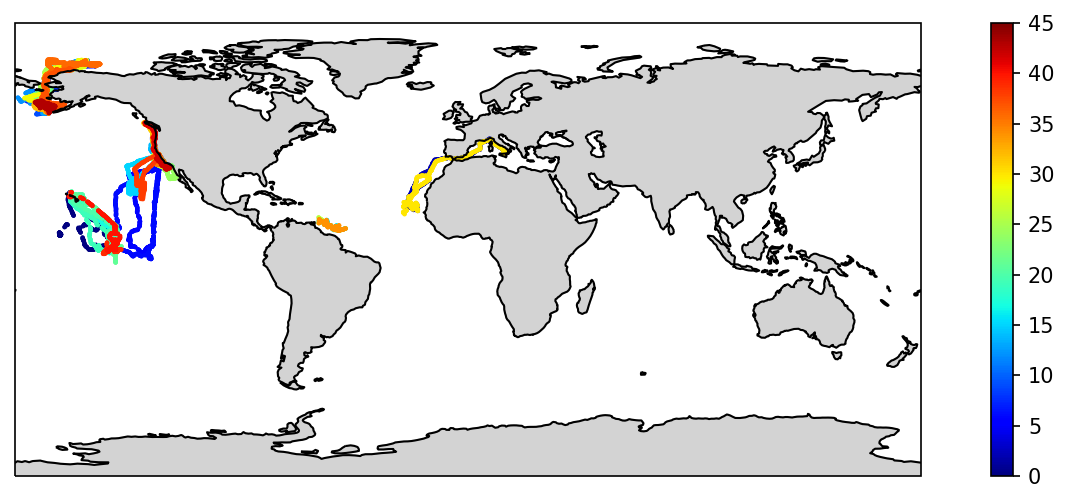

In [88]:
fig=plt.figure(figsize=(12,4),dpi=150)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.LAND, color='lightgrey')
d=0   
for i in fns:
    ds = xr.open_dataset(i)
    ds.close()  
    # map
    cb = ax.scatter(ds['lon'],ds['lat'], 5,np.full(len(ds.lon),d),'.', transform=ccrs.PlateCarree(), cmap='jet', vmin=0, vmax=45)
    d += 1
    
    #print(len(list(ds.variables.keys())))
fig.colorbar(cb)
plt.show()

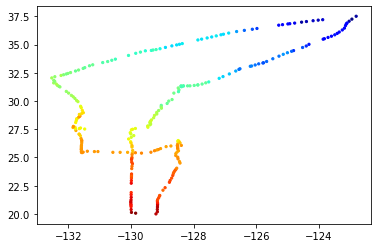

In [65]:
ds = xr.open_dataset('../saildrone data/saildrone-gen_4-shark-2018-sd1001-20180315T000000-20180529T235959-1_minutes-v1.1581626958976jplv05.0_orbitalnorep_20211116.nc')
ds.close()
plt.scatter(ds['lon'],ds['lat'], 5,ds['TEMP_CTD_MEAN'],'o', cmap='jet')

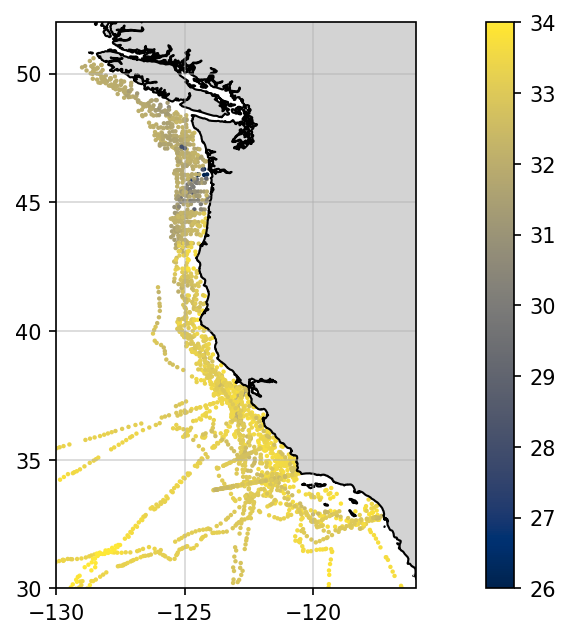

In [100]:
fig=plt.figure(figsize=(12,5),dpi=150)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-130,-116,30,52],crs=ccrs.PlateCarree())
ax.set_xticks([-130,-125,-120], crs=ccrs.PlateCarree())
ax.set_yticks([30,35,40,45,50], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.LAND, color='lightgrey')
    
for i in fns:
    ds = xr.open_dataset(i)
    ds.close()  
    # map
    cb = ax.scatter(ds['lon'],ds['lat'], 5,ds['SAL_CTD_MEAN'],'.', transform=ccrs.PlateCarree(), cmap='jet', vmin=26, vmax=34)
    #print(ds['SAL_CTD_MEAN'].min(),ds['SAL_CTD_MEAN'].max())
fig.colorbar(cb)
plt.grid(zorder=0, alpha=0.5)
plt.show()

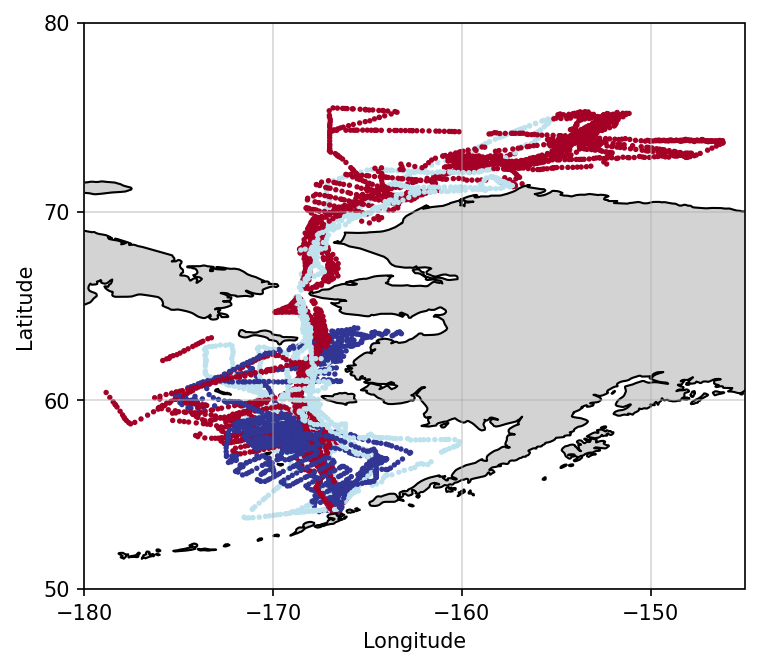

In [110]:
fig=plt.figure(figsize=(12,5),dpi=150)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-180,-145,50,80],crs=ccrs.PlateCarree())
ax.set_xticks([-180,-170,-160, -150], crs=ccrs.PlateCarree())
ax.set_yticks([50,60,70,80], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.LAND, color='lightgrey')
    
for i in fns:
    ds = xr.open_dataset(i)
    ds.close()  
    # map
    cb = ax.scatter(ds['lon'],ds['lat'], 10,ds.time.dt.year,'.', transform=ccrs.PlateCarree(), cmap='RdYlBu_r', vmin=2016, vmax=2019)
    #print(ds['SAL_CTD_MEAN'].min(),ds['SAL_CTD_MEAN'].max())
#cb2 = fig.colorbar(cb)
#cb2.set_label('SST (C)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(zorder=0, alpha=0.5)
plt.show()

In [111]:
ds

<xarray.Dataset>
Dimensions:                       (time: 369)
Coordinates:
  * time                          (time) datetime64[ns] 2016-05-25T18:56:45 ....
    ob                            (time) int64 ...
Data variables: (12/39)
    lat                           (time) float64 54.33 54.59 ... 54.33 54.26
    lon                           (time) float64 -166.5 -166.4 ... -166.4 -166.4
    COG_MEAN                      (time) float64 ...
    PITCH_MEAN                    (time) float64 ...
    ROLL_MEAN                     (time) float64 ...
    HDG_MEAN                      (time) float64 ...
    ...                            ...
    smap_rev_number               (time) float64 ...
    dist_land                     (time) float64 ...
    analysed_sst                  (time) float64 ...
    analysis_error                (time) float64 ...
    mask                          (time) float64 ...
    sea_ice_fraction              (time) float64 ...
Attributes:
    history:      FERRET V7.3  20-Dec-17
    Conventions:  CF-1.6
    featureType:  trajectory
    project:      PMEL_Arctic_2016
    vehicle_id:   sd126